In [1]:
from scipy import stats
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt

# Question 1
Using scipy.stats’s rvs method, sample 30 tuples (x1i, x2i, x3i, x4i)1≤i≤30
s.th.
x1i ∼ Normal(0, 1)
x2i ∼ Normal(2, 4)
x3i ∼ Uniform(0, 1)
x4i = x3i· z where z ∼ Uniform(0, 1)

In [2]:
x1 = stats.norm.rvs(loc=0, scale=1, size=30, random_state=0)

In [3]:
x2 = stats.norm.rvs(loc=2, scale=4, size=30, random_state=40)

In [4]:
x3 = stats.uniform.rvs(loc=0, scale=1, size=30, random_state=50)

In [5]:
x4 = x3*stats.uniform.rvs(loc=0, scale=1, size=30, random_state=90)

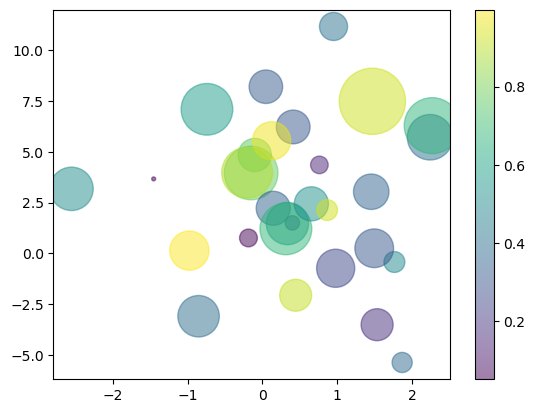

In [6]:
plt.scatter(x1, x2, c=x3, s=x4*3000, alpha=0.5)
plt.colorbar()

Answer 1: There seems to be a relationship with the colour and the sizes of the data points. The darker data points are smaller and as the size of the bubbles get larger, the colour is more green & yellow.
To validate this relationship, I will plot x3 and x4 in the next chart.

Text(0, 0.5, 'x4')

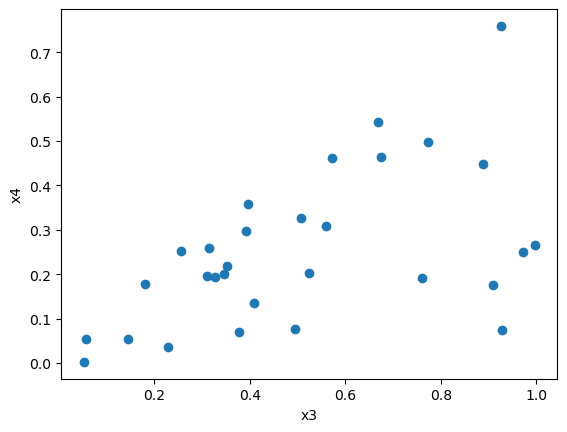

In [7]:
plt.scatter(x3, x4)
plt.xlabel('x3')
plt.ylabel('x4')

The above scatter plot confirms a linear relationship between x3 & x4 dimensions of the 4D data.

# Question 2
Display a QQ plot for the following probability measures: the standard normal
Normal(0, 1) on the x-axis and the standard Cauchy distribution Cauchy(0, 1) on the y-axis. What does
the QQ plot tell us about the tails of these distributions?

In [8]:
# Generating the normal and cauchy distributions and getting their percentiles
perc = np.linspace(0,100,100)
x = stats.norm.rvs(loc=0, scale=1, size=30, random_state=0)
x_p = np.percentile(x, perc)
y = stats.cauchy.rvs(loc=0, scale=1, size=30, random_state=0)
y_p = np.percentile(y, perc)

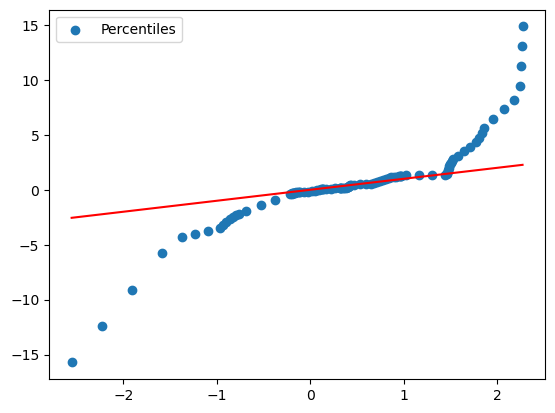

In [9]:
plt.plot(x_p, x_p, color='red') # diagonal line
plt.scatter(x_p, y_p, label='Percentiles')
plt.legend()

Answer2: The QQ plot has the ends deviating from the diagonal which signifies that one distribution has fatter tails. The plot is arch shaped because of the heavier tales of the Cauchy distribution.

# Question 3
Recall from the lectures that if we have two probability measures P1 and P2 with respective densities f1 and f2, then the density of the sum1
P1 + P2 is given by the convolution of the two densities.

In this question we consider the sum of Beta (2, 8) + Beta (8, 2). 
What is the support of Beta (2, 8)? 
What is the support of Beta (8, 2)? 
Therefore, what is the support of Beta (2, 8) + Beta (8, 2)?

Answer: The support of a Beta(2, 8) and Beta(2, 8) distribution is [0, 1]. Therefore the support for the sum of 2 beta distributions is [0, 2].

Write a function which implements the integrand of the integral above, that is to say that implements
f1(x)f2(t−x), where f1 is the density of Beta (2, 8) and f2 is the density of Beta (8, 2).

In [10]:
def integrand(x, t):
    y = stats.beta.pdf(x, a=2, b=8)*stats.beta.pdf(t-x, a=8, b=2)
    
    return y

In [11]:
# Generating points in the support of Beta(2, 8)+Beta(8,2)
t = np.linspace(0, 2, 100)
integration_result = []

for i in t:
    result, _ = integrate.quad(func=integrand, a=float('-inf'), b=float('inf'), args=(i,))
    integration_result.append(result)

Finally, generate 10000 samples from Beta (2, 8), 10000 samples from Beta (8, 2), add them, and plot the
histogram of these sums along with the pdf computed in the previous step. What do you observe?

In [12]:
N = 10000
dist1 = stats.beta.rvs(2, 8, size=N)
dist2 = stats.beta.rvs(8, 2, size=N)
sum_distributions = dist1 + dist2

In [13]:
min(sum_distributions), max(sum_distributions)

(0.28092050586678263, 1.6790822922427533)

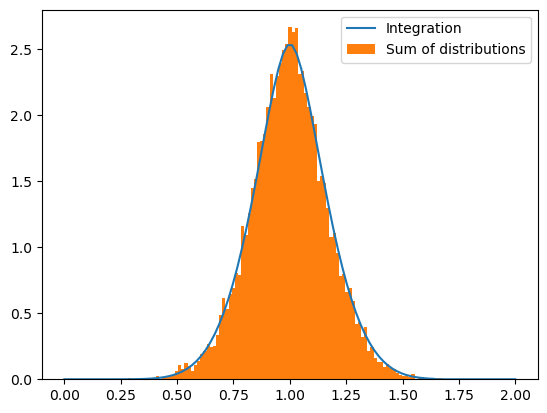

In [14]:
plt.plot(t, integration_result, label='Integration')
plt.hist(sum_distributions, bins=int(N**0.5), density=True, label='Sum of distributions')
plt.legend()

# Question 4
Sample mean process and sample mean distribution

Write a function called sample_mean taking as inputs two integers m and n. The function should
return an array of length n containing samples each obtained by taking m samples from the standard normal distribution and computing their sample mean. Call sample_mean(m=10, n=10000),
sample_mean(m=100, n=10000) , and sample_mean(m=1000, n=10000) and plot a histogram for
each of these outputs.

In [15]:
def sample_mean(m:int, n:int):
    n_samples = []
    m_means = []
    
    for i in range(0, n):
        m_samples = stats.norm.rvs(loc=0, scale=1, size=m)
        n_samples.append(m_samples)
        m_means.append(m_samples.mean(axis=0))
    
    return m_means

In [16]:
sample_means = sample_mean(m=10, n=10000)
sample_means_mean = sum(sample_means)/len(sample_means)
print('mean of n sampled dataset means:',sample_means_mean)

mean of n sampled dataset means: 0.0029966444121232384


In [17]:
answer_m10 = np.array(sample_means)

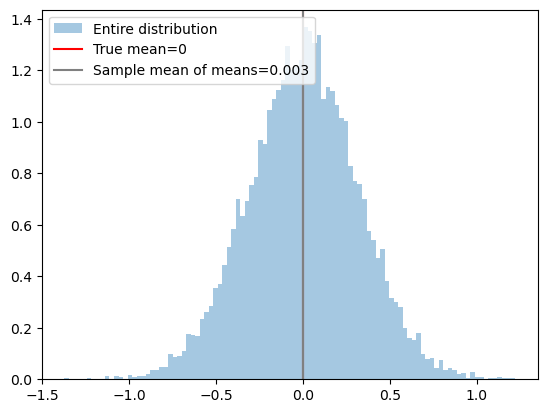

In [18]:
# Histogram of all the sampled distributions for m=10, n=10000
plt.hist(sample_means, bins=int(10000**0.5), density=True, alpha=0.4, label='Entire distribution')
plt.axvline(x=0, color='red', label = 'True mean=0')
plt.axvline(x=sample_means_mean, color='grey', label='Sample mean of means={:.3f}'.format(sample_means_mean))
plt.legend()
plt.show()

In [19]:
sample_means = sample_mean(m=100, n=10000)
sample_means_mean = sum(sample_means)/len(sample_means)
print('mean of n sampled dataset means:',sample_means_mean)

mean of n sampled dataset means: -0.00020119848399761687


In [20]:
answer_m100 = np.array(sample_means)

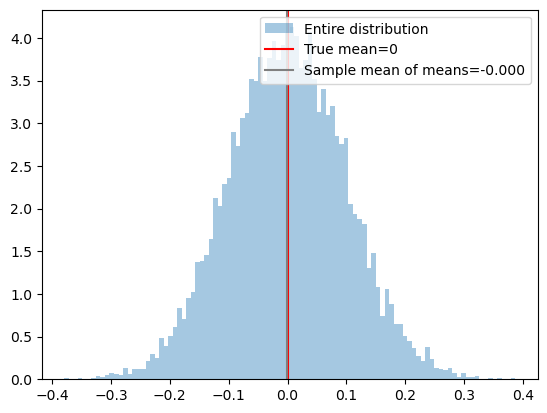

In [21]:
# Histogram of all the sampled distributions for m=10, n=10000
plt.hist(sample_means, bins=int(len(sample_means)**0.5), density=True, alpha=0.4, label='Entire distribution')
plt.axvline(x=0, color='red', label = 'True mean=0')
plt.axvline(x=sample_means_mean, color='grey', label='Sample mean of means={:.3f}'.format(sample_means_mean))
plt.legend()
plt.show()

In [22]:
sample_means = sample_mean(m=1000, n=10000)
sample_means_mean = sum(sample_means)/len(sample_means)
print('mean of n sampled dataset means:',sample_means_mean)

mean of n sampled dataset means: -0.00011086393319538621


In [23]:
answer_m1000 = np.array(sample_means)

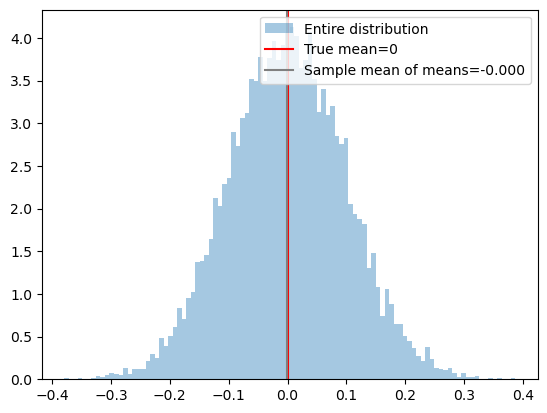

In [24]:
# Histogram of all the sampled distributions for m=10, n=10000
plt.hist(answer_m100, bins=int(len(sample_means)**0.5), density=True, alpha=0.4, label='Entire distribution')
plt.axvline(x=0, color='red', label = 'True mean=0')
plt.axvline(x=sample_means_mean, color='grey', label='Sample mean of means={:.3f}'.format(sample_means_mean))
plt.legend()
plt.show()

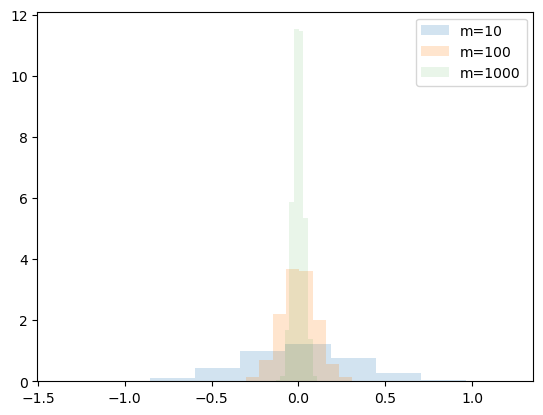

In [25]:
# Plotting all the histograms together
plt.hist(answer_m10, density=True, alpha=0.2, label='m=10')
plt.hist(answer_m100, density=True, alpha=0.2, label='m=100')
plt.hist(answer_m1000, density=True, alpha=0.1, label='m=1000')
plt.legend()
plt.show()

Answer 4(a) Comparing the 3 histograms:
As the we increase the number of times we sample from the distribution, the mean of the dataset gets closer to the true mean (which is 0) and the standard deviation gets closer to the true standard deviation (which is 1).

Theory:
1. Normal distributions have the following two properties:
• the sum of two normals is normal
• re-scaling a normal gives a normal: for any α > 0, α · Normal(µ, σ) = Normal(αµ, ασ)
Using the above  to compute the distribution of sample means for identically and normally distributed
independent samples, the probability measure is equal to the summed and scaled Normal distribution.
- µ of the new distribution is summation of all µi and scaled by the number of times the samples were drawn
- σ of the new distribution is square root of the sum of squares of the scaled σ

In [26]:
class SampleMeanDistribution:
    def __init__(self, m):
        m_distributions = []
        self.m_means = []
        self.m_variances = []
        n = 10000 # number of samples in each m distributions
        for i in range(m):
            distribution = stats.norm.rvs(loc=0, scale=1, size=n, random_state=0)
            m_distributions.append(distribution)
            
        self.m_sampled_dist = np.array(m_distributions)

        # Mean of the probability measure
        mean_distributions = self.m_sampled_dist.mean()
        self.data_mean = mean_distributions.sum()/len(m_distributions)

        # Std of the probability measure
        var_distributions = self.m_sampled_dist.var()
        self.data_std = (var_distributions.sum()/len(m_distributions))**0.5

By solving the theory question, the mean of the probability measure is the mean of the identical distributions = 0 and standard deviation is distribution_std / square_root(m)

In [27]:
m = 10
x_mean, x_std = 0, 1/(m**0.5)

In [28]:
obj = SampleMeanDistribution(m)
x1 = np.sort(obj.m_sampled_dist.flatten())

print("Parameters of the entire distribution N(0,1):",x_mean,",",x_std)
print("Parameters of the probability measure:",obj.data_mean,",",obj.data_std)

Parameters of the entire distribution N(0,1): 0 , 0.31622776601683794
Parameters of the probability measure: -0.0018433720158265814 , 0.3122928073695898


In [29]:
print("\nDifference in the mean of the entire distribution and probability measure mean:",abs(x_mean-obj.data_mean))


Difference in the mean of the entire distribution and probability measure mean: 0.0018433720158265814


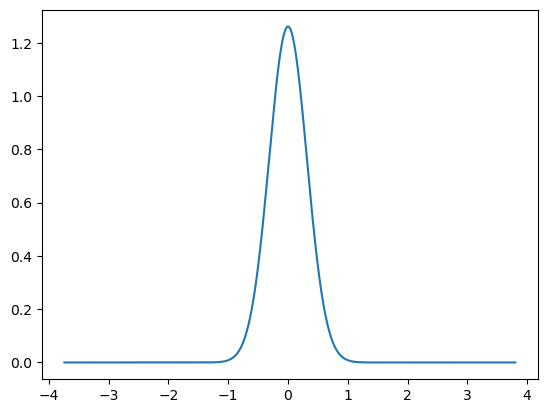

In [30]:
pdf1 = stats.norm.pdf(x1, x_mean, x_std)
plt.plot(x1, pdf1)
plt.show()

In [31]:
m = 100
x_mean, x_std = 0, 1/(m**0.5)

In [32]:
m = 100
obj = SampleMeanDistribution(m)
x2 = np.sort(obj.m_sampled_dist.flatten())

print("Parameters of the entire distribution N(0,1):",x_mean,",",x_std)
print("Parameters of the probability measure:",obj.data_mean,",",obj.data_std)

Parameters of the entire distribution N(0,1): 0 , 0.1
Parameters of the probability measure: -0.00018433720158265817 , 0.09875565681761206


In [33]:
print("\nDifference in the mean of the entire distribution and probability measure:",abs(x_mean-obj.data_mean))


Difference in the mean of the entire distribution and probability measure: 0.00018433720158265817


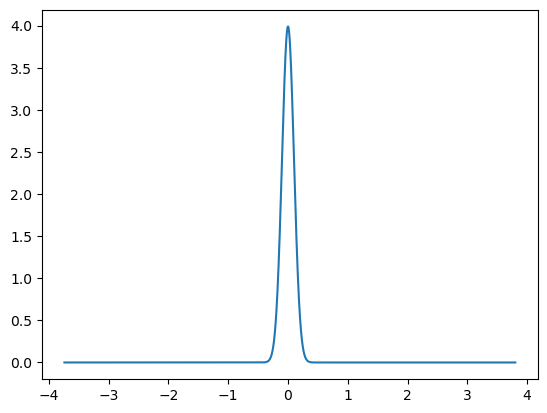

In [34]:
pdf2 = stats.norm.pdf(x2, x_mean, x_std)
plt.plot(x2, pdf2)

In [35]:
m = 1000
x_mean, x_std = 0, 1/(m**0.5)

In [36]:
obj = SampleMeanDistribution(m)
x3 = np.sort(obj.m_sampled_dist.flatten())

print("Parameters of the entire distribution N(0,1):",x_mean,",",x_std)
print("Parameters of the probability measure:",obj.data_mean,",",obj.data_std)

Parameters of the entire distribution N(0,1): 0 , 0.03162277660168379
Parameters of the probability measure: -1.8433720158265837e-05 , 0.03122928073695896


In [37]:
print("\nDifference in the mean of the entire distribution and probability measure:",abs(x_mean-obj.data_mean))


Difference in the mean of the entire distribution and probability measure: 1.8433720158265837e-05


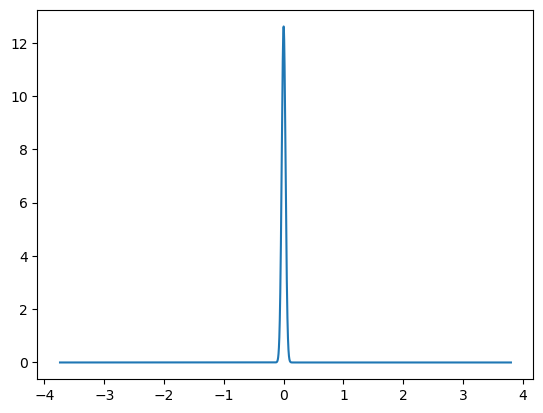

In [38]:
pdf3 = stats.norm.pdf(x3, x_mean, x_std)
plt.plot(x3, pdf3)

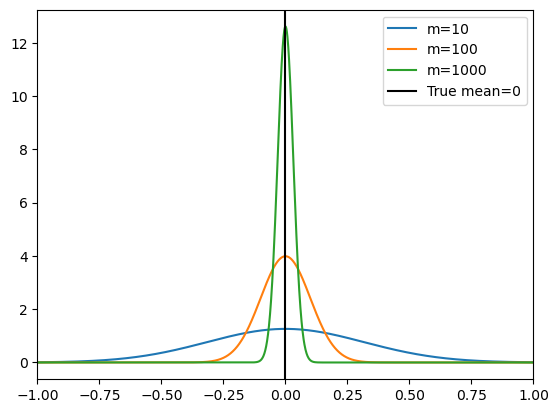

In [39]:
# comparing the 3 pdfs
plt.plot(x1, pdf1, label='m=10')
plt.plot(x2, pdf2, label='m=100')
plt.plot(x3, pdf3, label='m=1000')
plt.axvline(x=0, color='black', label = 'True mean=0')
plt.xlim(-1, 1)
plt.legend()

Answer4(b): Comparing the 3 PDFs
As we increase the number of times we sample from the distribution, we see the mean is closer to the true mean and more samples lie around that. Commenting on the shape of the PDFs: the peak at mean=0 is higher when we sample more times. This proves the (weak) law of large numbers the sample mean is a consistent estimator of the true mean in a small interval epsilon as the number of samples tends to infinity. 
We can see the difference in the true mean and the mean of sample means gets smaller as `m` grows larger.

/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


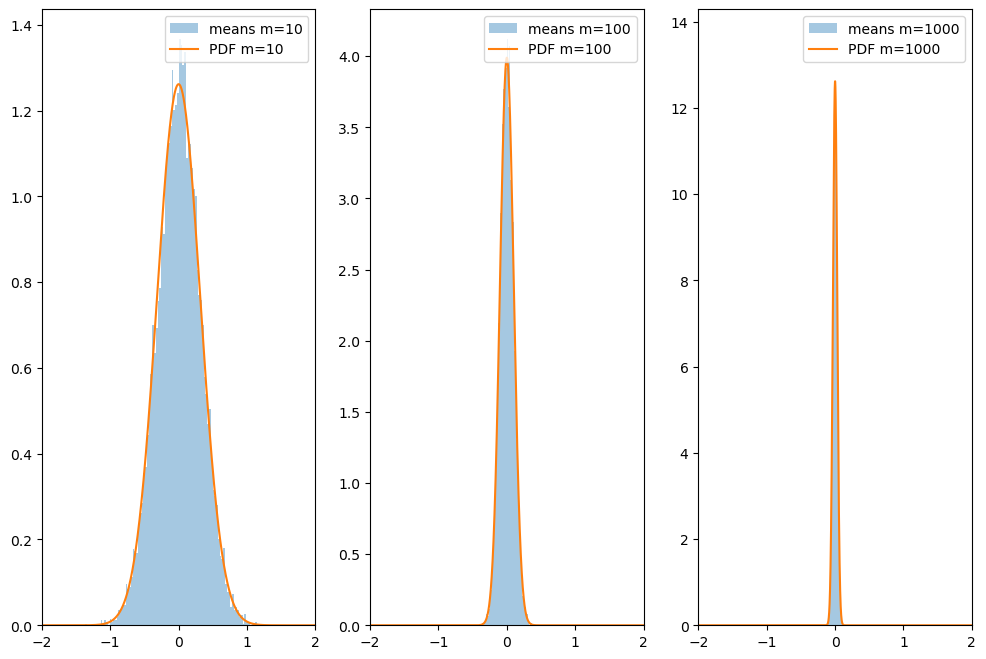

In [40]:
# Comparing the PDF with the histogram for m=10
fig, ax = plt.subplots(1,3, figsize=(12,8))

ax[0].hist(answer_m10, bins=int(len(answer_m10)**0.5), density=True, alpha=0.4, label='means m=10')
ax[0].plot(x1, pdf1, label='PDF m=10')
ax[0].set_xlim(-2, 2)
ax[0].legend()

ax[1].hist(answer_m100, bins=int(len(answer_m100)**0.5), density=True, alpha=0.4, label='means m=100')
ax[1].plot(x2, pdf2, label='PDF m=100')
ax[1].set_xlim(-2, 2)
ax[1].legend()

ax[2].hist(answer_m1000, bins=int(len(answer_m1000)**0.5), density=True, alpha=0.4, label='means m=1000')
ax[2].plot(x3, pdf3, label='PDF m=1000')
ax[2].set_xlim(-2, 2)
ax[2].legend()

Answer4(c): Comparing the histograms with the PDFs
The histograms are means of the samples and line graph is actual probability density function distribution. As the number of times we sample the distribution increases, the means converges to the PDF, making it a good estimation of the data distribution.